PURPOSE OF CODE



In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
df=pd.read_csv('data/test-calculated-recursive.csv',sep="\t")
df = df.drop('Unnamed: 0', 1)
df.head(n=100)
resultFile = open("result.txt", "a")

In [12]:
size=len(df)

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
def draw (tmpdf,title):
    tmpsize=len(tmpdf)
    resultFile.write("\n"+"\n"+title+"\n"+"(%"+str("%.2f" %(tmpsize/size*100))+" of total sentiments ("+str(tmpsize)+" sentiment))")
    res=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
    xlabel=[0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75]
    data=[]
    for x in range(0,len(res)-1):
        tmp=tmpdf.between(res[x],res[x+1]-0.0000000000000001)
        tmpcount=tmp.sum()
        tmppercent=tmpcount/tmpsize*100
        data.append(tmppercent)
        line=""
        for y in range(0,int(tmppercent/5)):
            line+="|"
        resultFile.write("\n"+str(res[x])+"-"+str(res[x+1])+"\t"+"%"+str("%.2f" %tmppercent)+"\t"+"("+str(tmpcount)+")"+"\t"+line)
    %matplotlib inline
    plt.plot(xlabel,data)
    plt.title(title)
    plt.xlabel('error 0 to 5')
    plt.ylabel('percent in total error')

count    29316.000000
mean         0.427650
std          0.492414
min          0.000000
25%          0.000000
50%          0.250000
75%          1.000000
max          3.000000
Name: error, dtype: float64

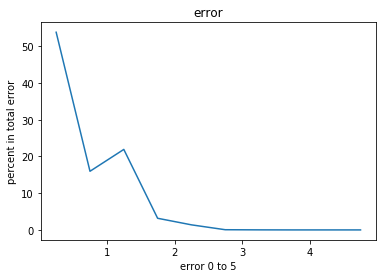

In [13]:
draw(df.error,"error")
resultFile.write("\n"+df.error.describe().to_string()+"\n")
df.error.describe()

count    6640.000000
mean        0.636805
std         0.538969
min         0.000000
25%         0.000000
50%         0.625000
75%         1.000000
max         3.000000
Name: error, dtype: float64

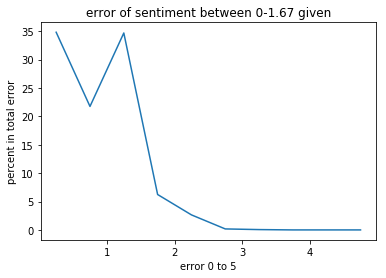

In [14]:
tmplist=df.Sentiment.between(0,1.666666666666666)
tmpdf=df.error[tmplist]
draw(tmpdf,"error of sentiment between 0-1.67 given")
resultFile.write("\n"+tmpdf.describe().to_string()+"\n")
tmpdf.describe()

count    20915.000000
mean         0.327695
std          0.425235
min          0.000000
25%          0.000000
50%          0.069841
75%          0.500000
max          3.000000
Name: error, dtype: float64

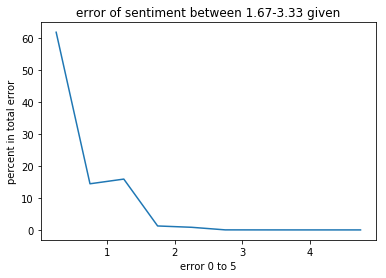

In [15]:
tmplist=df.Sentiment.between(1.666666666666667,3.333333333333332)
tmpdf=df.error[tmplist]
draw(tmpdf,"error of sentiment between 1.67-3.33 given")
resultFile.write("\n"+tmpdf.describe().to_string()+"\n")
tmpdf.describe()

count    1761.000000
mean        0.826147
std         0.592891
min         0.000000
25%         0.000000
50%         1.000000
75%         1.178571
max         2.833333
Name: error, dtype: float64

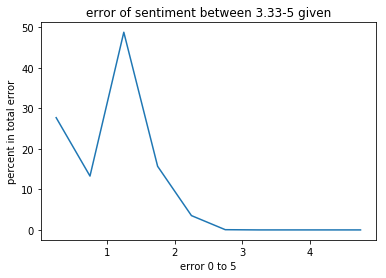

In [16]:
tmplist=df.Sentiment.between(3.333333333333332,5)
tmpdf=df.error[tmplist]
draw(tmpdf,"error of sentiment between 3.33-5 given")
resultFile.write("\n"+tmpdf.describe().to_string()+"\n")
tmpdf.describe()

In [17]:
resultFile.write("\n---------------------------------")

34

In [18]:
resultFile.close()